In [2]:
#import Librbry
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
# Loding data set 
df= pd.read_csv('House price prediction data set/House Price Prediction Dataset.csv')

In [4]:
print(df.head())

   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  


In [49]:
df.isnull()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False


In [77]:
#Condition vs Prices 
condition_mapping = {
    "Poor": 0,
    "Fair":1,
    "Good": 2,
    "Excellent": 3
}
X = df[['Condition']].replace(condition_mapping).astype(int)
y = df[['Price']]

C:\Users\Gyanendra Tiwari\AppData\Local\Temp\ipykernel_4008\3487611170.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = df[['Condition']].replace(condition_mapping).astype(int)


In [78]:
# Train test split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [79]:
#Train Linear regression 
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [80]:
# Prediction & evalution
y_pred = lr.predict(X_test)
print("Coef(w):",lr.coef_,"Intercept(b):",lr.intercept_)

Coef(w): [[-5195.61291098]] Intercept(b): [543837.48726948]


In [81]:
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))

MSE: 77992136597.7559
R2: -0.002484717077803733


In [82]:
#Residule Plot and Predictied line 
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Gyanendra Tiwari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


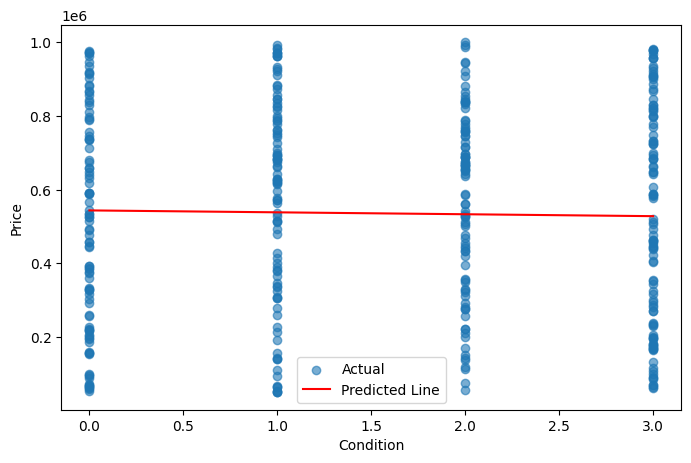

In [83]:
plt.figure(figsize=(8,5))

# Scatter plot for actual values
plt.scatter(X_test, y_test, alpha=0.6, label="Actual")

# Sort X_test for smooth line
X_sorted = np.sort(X_test.values.reshape(-1, 1), axis=0)
y_pred_line = lr.predict(X_sorted)

# Regression line
plt.plot(X_sorted, y_pred_line, color='red', label="Predicted Line")

# Labels and legend
plt.xlabel('Condition')
plt.ylabel('Price')
plt.legend()
plt.show()
